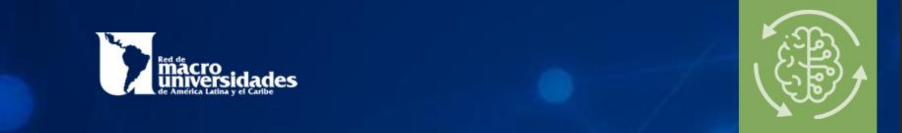


---
<center>

💻 **INTELIGENCIA ARTIFICIAL - LIDeSIA -FCEFyN - UNC**

</center>


---

Autor: Ing. Sandro Mauricio Comerci

Directora:    Dra. Inga. Laura Diaz Dávila.
###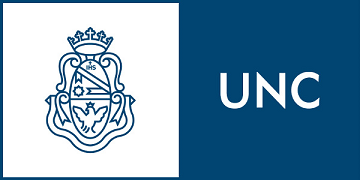

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
clima=pd.read_csv('/content/drive/MyDrive/Inteligencia Artificial/Materia/2021/clima_curadav3.csv')

In [ ]:
clima

,MinTemp,MaxTemp,Rainfall,Evaporation,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,sunshine,windspeed,speed9am,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,8.0,24.3,0.0,3.4,20,68,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6,6.3,30.0,6.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,14.0,26.9,3.6,4.4,17,80,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6,9.7,39.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,13.7,23.4,3.6,5.8,6,82,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8,3.3,85.0,6.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,13.3,15.5,39.8,7.2,24,62,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8,9.1,54.0,30.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,7.6,16.1,2.8,5.6,28,68,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0,10.6,50.0,20.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,50,38,15,1016.1,1010.8,1,3,20.4,30.0,0,0.0,12.1,76.0,7.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
362,7.1,28.4,0.0,11.6,19,45,22,1020.0,1016.9,0,1,17.2,28.2,0,0.0,12.7,48.0,2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
363,12.5,19.9,0.0,8.4,9,63,47,1024.0,1022.8,3,2,14.5,18.3,0,0.0,5.3,43.0,11.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
364,12.5,26.9,0.0,5.0,28,69,39,1021.0,1016.2,6,7,15.8,25.9,0,0.0,7.1,46.0,6.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
inputs=clima.drop(columns=['RainToday'])
inputs=clima.drop(columns=['RainToday'])
target=np.array(clima['RainToday'])

In [ ]:
train_inputs, test_inputs, train_target, test_target = train_test_split(inputs, target, test_size = 0.2, random_state = 42)

In [ ]:
print('train inputs', train_inputs.shape)
print('train targets', train_target.shape)
print('test inputs', test_inputs.shape)
print('test targtet', test_target.shape)

train inputs (292, 33)
train targets (292,)
test inputs (74, 33)
test targtet (74,)


In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [ ]:
train_inputs=min_max_scaler.fit_transform(train_inputs)
test_inputs=min_max_scaler.fit_transform(test_inputs)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_params={

    'random_forest':{
        'model':RandomForestClassifier(class_weight="balanced"),
        'params':{
            'n_estimators':[10,50,100],
            'max_depth':[5, 10],
            'min_samples_split':[10,50,100],
            'min_samples_leaf':[10,50,100],
            'criterion':['gini','entropy']

        }
    }
}

In [ ]:
from sklearn.model_selection import GridSearchCV
score=[]

for model_name, mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=5, return_train_score=False)

    clf.fit(train_inputs, train_target)

    score.append({
        'model':model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [ ]:
df_score=pd.DataFrame(score,columns=['model','best_score','best_params'])
df_score.to_csv('mejor_modelo.csv')
df_score

,model,best_score,best_params
0,random_forest,0.986324,"{'criterion': 'entropy', 'max_depth': 10, 'min..."


In [ ]:
tree=RandomForestClassifier(criterion='gini', max_depth= 5, min_samples_leaf= 10, min_samples_split= 50, n_estimators= 100)
tree.fit(train_inputs,train_target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
prediccion=tree.predict(test_inputs)

Text(24.0, 0.5, 'Target')

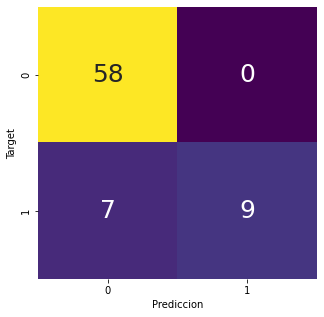

In [ ]:
cm=confusion_matrix(test_target, prediccion)
import matplotlib.pyplot as plt
import seaborn as sn
# convert the ndarray to a pandas dataframe
cm_df = pd.DataFrame(cm)
# set the size of the figure
plt.figure(figsize = (5,5))
sn.heatmap(cm_df,
           annot=True, annot_kws={"size": 25},
           fmt="d",         # decimals format
           xticklabels=True,
           yticklabels=True,
           cmap="viridis",
           cbar=False)
plt.xlabel('Prediccion')
plt.ylabel('Target')

In [ ]:
accuracy=accuracy_score(test_target, prediccion)
accuracy

0.9054054054054054

In [ ]:
tp, fn, fp, tn = confusion_matrix(test_target , prediccion).ravel()
print("Number of true positives  (tp) = ",tp)
print("Number of true negatives  (tn) = ",tn)

print("Number of false positives (fp) = ",fp)
print("Number of false negatives (fn) = ",fn)

print("Precision                                          = tp / (tp + fp) =", tp / (tp + fp))
print("Recall or 'sensitivity' (aka. true positive rate)  = tp / (tp + fn) =", tp / (tp + fn))
print("Specificity             (aka. true negative rate)  = tn / (tn + fp) =", tn / (tn + fp))
print("Fall out                (aka. false positive rate) = fp / (fp + tn) =", fp / (fp + tn))
print("Miss rate               (aka. false negative rate) = fn / (fn + tp) =", fn / (fn + tp))

Number of true positives  (tp) =  58
Number of true negatives  (tn) =  9
Number of false positives (fp) =  7
Number of false negatives (fn) =  0
Precision                                          = tp / (tp + fp) = 0.8923076923076924
Recall or 'sensitivity' (aka. true positive rate)  = tp / (tp + fn) = 1.0
Specificity             (aka. true negative rate)  = tn / (tn + fp) = 0.5625
Fall out                (aka. false positive rate) = fp / (fp + tn) = 0.4375
Miss rate               (aka. false negative rate) = fn / (fn + tp) = 0.0


AUC =  0.78125


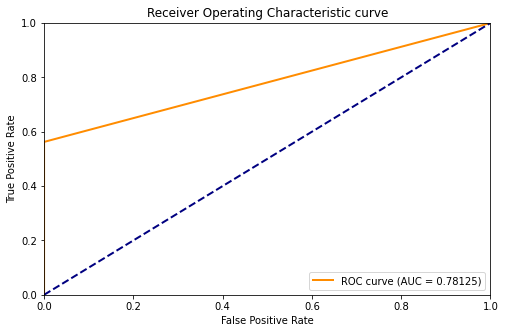

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_target , prediccion)

from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(test_target , prediccion)
print("AUC = ", roc_auc)

plt.figure(figsize = (8,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
inputs_list=list(inputs.columns)
inputs=np.array(inputs)

In [ ]:
# Get numerical feature importances
importances = list(clf.best_estimator_.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(inputs_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Rainfall             Importance: 0.49
Variable: Humidity3pm          Importance: 0.06
Variable: Pressure9am          Importance: 0.06
Variable: Pressure3pm          Importance: 0.05
Variable: MinTemp              Importance: 0.04
Variable: Humidity9am          Importance: 0.04
Variable: Cloud9am             Importance: 0.04
Variable: RISK_MM              Importance: 0.04
Variable: Evaporation          Importance: 0.03
Variable: windspeed            Importance: 0.03
Variable: speed9am             Importance: 0.03
Variable: Temp9am              Importance: 0.02
Variable: Temp3pm              Importance: 0.02
Variable: sunshine             Importance: 0.02
Variable: MaxTemp              Importance: 0.01
Variable: WindSpeed3pm         Importance: 0.01
Variable: Cloud3pm             Importance: 0.01
Variable: WindDir3pm_E         Importance: 0.0
Variable: WindDir3pm_ENE       Importance: 0.0
Variable: WindDir3pm_ESE       Importance: 0.0
Variable: WindDir3pm_N         Importance: 